### Här importerar jag bara de paket jag använder (MNE-Python är underbart!)

Sen är det lite tråkigheter som att läsa in filen och titta vilka kanaler som är rimliga att ta bort

In [1]:
import mne
from mne.preprocessing import ICA
from mne_icalabel import label_components
import matplotlib.pyplot as plt
import numpy as np
#mne.viz.use_browser_backend("matplotlib")
from neurone_loader_fix import Recording

In [2]:
fpath_pre = '/Users/alexe/Kaggle/tdcs/M_pre_post_tDCS/Test_M_raw_eeg_pre'
fpath_post = '/Users/alexe/Kaggle/tdcs/M_pre_post_tDCS/Test_M_raw_EEG_post'

rec_pre = Recording(fpath_pre)
rec_post = Recording(fpath_post)

In [3]:
if rec_pre.sessions[0].subject_info is not None:
    if rec_pre.sessions[0].subject_info.get('last_name') is None:
        rec_pre.sessions[0].subject_info['last_name'] = ''
    if rec_pre.sessions[0].subject_info.get('first_name') is None:
        rec_pre.sessions[0].subject_info['first_name'] = ''

if rec_post.sessions[0].subject_info is not None:
    if rec_post.sessions[0].subject_info.get('last_name') is None:
        rec_post.sessions[0].subject_info['last_name'] = ''
    if rec_post.sessions[0].subject_info.get('first_name') is None:
        rec_post.sessions[0].subject_info['first_name'] = ''

raw_pre = rec_pre.sessions[0].to_mne(substitute_zero_events_with=10)
raw_post = rec_post.sessions[0].to_mne(substitute_zero_events_with=10)

Creating RawArray with float64 data, n_channels=33, n_times=8320175
    Range : 0 ... 8320174 =      0.000 ...  1664.035 secs
Ready.
Creating RawArray with float64 data, n_channels=33, n_times=5982408
    Range : 0 ... 5982407 =      0.000 ...  1196.481 secs
Ready.


In [4]:
print(raw_pre.info)
print(raw_post.info)

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 32 EEG, 1 EMG, 1 Stimulus
 custom_ref_applied: False
 dig: 0 items
 highpass: 0.0 Hz
 lowpass: 2500.0 Hz
 meas_date: 2025-02-02 16:32:46 UTC
 nchan: 34
 projs: []
 sfreq: 5000.0 Hz
 subject_info: <subject_info | his_id: Test_M_raw_eeg_pre, last_name: , first_name: , birthday: 1962-12-23>
>
<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 32 EEG, 1 EMG, 1 Stimulus
 custom_ref_applied: False
 dig: 0 items
 highpass: 0.0 Hz
 lowpass: 2500.0 Hz
 meas_date: 2025-02-02 18:37:06 UTC
 nchan: 34
 projs: []
 sfreq: 5000.0 Hz
 subject_info: <subject_info | his_id: Test_M_raw_EEG_post, last_name: , first_name: , birthday: 1962-12-23>
>


In [5]:
raw_pre.info.ch_names

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T7',
 'T8',
 'P7',
 'P8',
 'Fz',
 'Cz',
 'Pz',
 'Iz',
 'FC1',
 'FC2',
 'CP1',
 'CP2',
 'FC5',
 'FC6',
 'CP5',
 'CP6',
 'TP9',
 'TP10',
 'AFz',
 'FCz',
 'EMG1',
 'STI 014']

In [6]:
raw_pre.drop_channels(['EMG1', 'STI 014'])
raw_post.drop_channels(['EMG1', 'STI 014'])

<RawArray | 32 x 5982408 (1196.5 s), ~1.43 GiB, data loaded>

In [7]:
builtin_montages = mne.channels.get_builtin_montages(descriptions=True)
for montage_name, montage_description in builtin_montages:
    print(f"{montage_name}: {montage_description}")

standard_1005: Electrodes are named and positioned according to the international 10-05 system (343+3 locations)
standard_1020: Electrodes are named and positioned according to the international 10-20 system (94+3 locations)
standard_alphabetic: Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)
standard_postfixed: Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)
standard_prefixed: Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)
standard_primed: Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)
biosemi16: BioSemi cap with 16 electrodes (16+3 locations)
biosemi32: BioSemi cap with 32 electrodes (32+3 locations)
biosemi64: BioSemi cap with 64 electrodes (64+3 locations)
biosemi128: BioSemi cap with 128 electrodes (1

### Lite information om rådata

In [8]:
montage = mne.channels.make_standard_montage("easycap-M1")
raw_pre.set_montage(montage)
raw_post.set_montage(montage)

<RawArray | 32 x 5982408 (1196.5 s), ~1.43 GiB, data loaded>

In [9]:
duration_pre = raw_pre.n_times / raw_pre.info["sfreq"]  # Total seconds
print(f"Duration pre: {duration_pre / 60:.1f} minutes")
print(f"Shape: {raw_pre.get_data().shape} (channels × samples)")

duration_post = raw_post.n_times / raw_post.info["sfreq"]  # Total seconds
print(f"Duration post: {duration_post / 60:.1f} minutes")
print(f"Shape: {raw_post.get_data().shape} (channels × samples)")

Duration pre: 27.7 minutes
Shape: (32, 8320175) (channels × samples)
Duration post: 19.9 minutes
Shape: (32, 5982408) (channels × samples)


In [10]:
#raw_pre.plot()

### Viktigt att filtrera tidigt för att undvika vikningseffekter och det gjorde de i artikeln som vi utgår ifrån har jag för mig

In [11]:
filt_raw_pre = raw_pre.filter(l_freq=2, h_freq=70)
filt_raw_post = raw_post.filter(l_freq=2, h_freq=70)
filt_raw_pre = filt_raw_pre.notch_filter(freqs=np.arange(50, 251, 50))
filt_raw_post = filt_raw_post.notch_filter(freqs=np.arange(50, 251, 50))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 70 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 70.00 Hz
- Upper transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 78.75 Hz)
- Filter length: 8251 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.4s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 70 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 70.00 Hz
- Upper transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 78.75 Hz)
- Filter length: 8251 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 33001 samples (6.600 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    3.1s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 33001 samples (6.600 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.2s


In [12]:
#filt_raw_pre.plot()

In [13]:
#filt_raw_post.plot()

### Referera om till medelvärdersreferens innn ICA (det gör det lite lättare för ICAn att sortera ut skräp)

In [14]:
raw_pre.set_eeg_reference('average')
raw_post.set_eeg_reference('average')

ica_pre = ICA(
    n_components=15,
    max_iter="auto",
    method="infomax",
    random_state=42,
    fit_params=dict(extended=True),
)

ica_pre.fit(filt_raw_pre)

ica_post = ICA(
    n_components=15,
    max_iter="auto",
    method="infomax",
    random_state=42,
    fit_params=dict(extended=True),
)

ica_post.fit(filt_raw_post)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 15 components
Computing Extended Infomax ICA
Fitting ICA took 472.1s.
Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 15 components
Computing Extended Infomax ICA
Fitting ICA took 297.3s.


Method,infomax
Fit parameters,extended=Truemax_iter=500
Fit,500 iterations on raw data (5982408 samples)
ICA components,15
Available PCA components,32
Channel types,eeg
ICA components marked for exclusion,—


In [15]:
raw_pre.plot()

Using qt as 2D backend.
Using pyopengl with version 3.1.6


## Jag plottar komponenterna för att se att vad ICAn hittade

In [16]:
#ica_pre.plot_sources(raw_pre, show_scrollbars=False, show=True, title='ICA sources PRE')

Creating RawArray with float64 data, n_channels=15, n_times=8320175
    Range : 0 ... 8320174 =      0.000 ...  1664.035 secs
Ready.
Using pyopengl with version 3.1.6


In [17]:
## Jag plottar komponenterna för att se att vad ICAn hittade
#ica_post.plot_sources(raw_post, show_scrollbars=False, show=True, title='ICA sources POST')

Creating RawArray with float64 data, n_channels=15, n_times=5982408
    Range : 0 ... 5982407 =      0.000 ...  1196.481 secs
Ready.
Using pyopengl with version 3.1.6


## Använder sedan ICA_label som kortfattat är ett NN tränat på att klassificera ICA komponenter som brus, inte brus eller okänt och det finns inbakat i MNE)

In [18]:
ic_labels_pre = label_components(filt_raw_pre, ica_pre, method="iclabel")
for i, l in enumerate(ic_labels_pre["labels"]):
    print(f"ICA pre {i}: {l}")

ic_labels_post = label_components(filt_raw_post, ica_post, method="iclabel")
for i, l in enumerate(ic_labels_post["labels"]):
    print(f"ICA post {i}: {l}")

/var/folders/9m/04qxqpfn46d0n6sjf6pkwwh80000gn/T/ipykernel_38894/1297232829.py:1: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels_pre = label_components(filt_raw_pre, ica_pre, method="iclabel")


ICA pre 0: brain
ICA pre 1: brain
ICA pre 2: brain
ICA pre 3: brain
ICA pre 4: eye blink
ICA pre 5: brain
ICA pre 6: eye blink
ICA pre 7: brain
ICA pre 8: muscle artifact
ICA pre 9: muscle artifact
ICA pre 10: brain
ICA pre 11: muscle artifact
ICA pre 12: muscle artifact
ICA pre 13: muscle artifact
ICA pre 14: brain


/var/folders/9m/04qxqpfn46d0n6sjf6pkwwh80000gn/T/ipykernel_38894/1297232829.py:5: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels_post = label_components(filt_raw_post, ica_post, method="iclabel")


ICA post 0: other
ICA post 1: brain
ICA post 2: brain
ICA post 3: brain
ICA post 4: brain
ICA post 5: brain
ICA post 6: muscle artifact
ICA post 7: brain
ICA post 8: brain
ICA post 9: eye blink
ICA post 10: brain
ICA post 11: brain
ICA post 12: brain
ICA post 13: muscle artifact
ICA post 14: brain


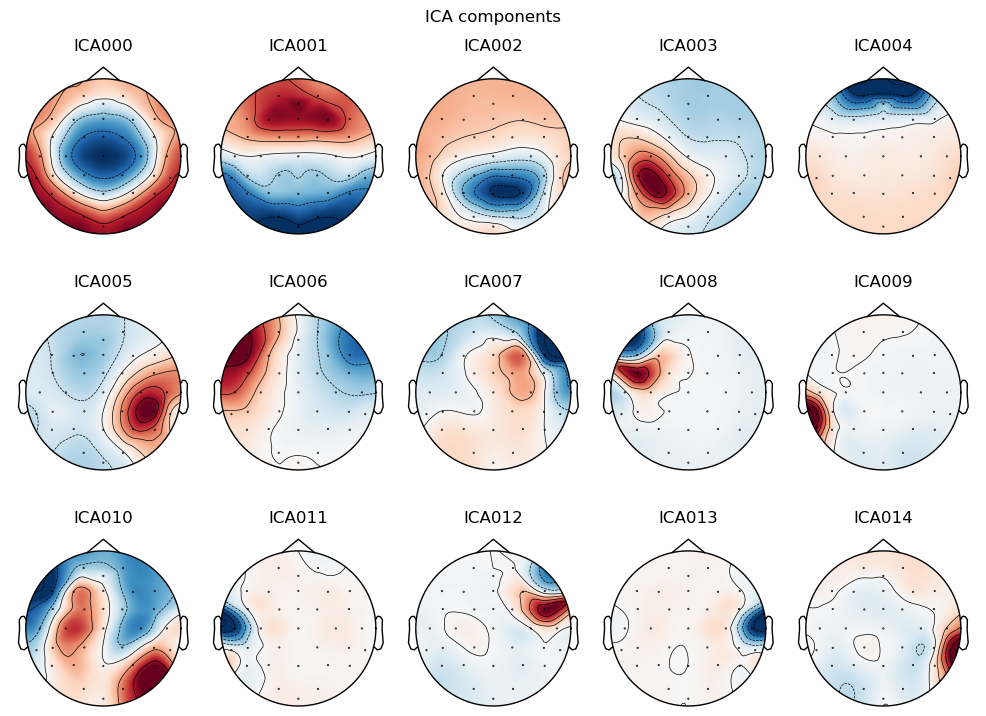

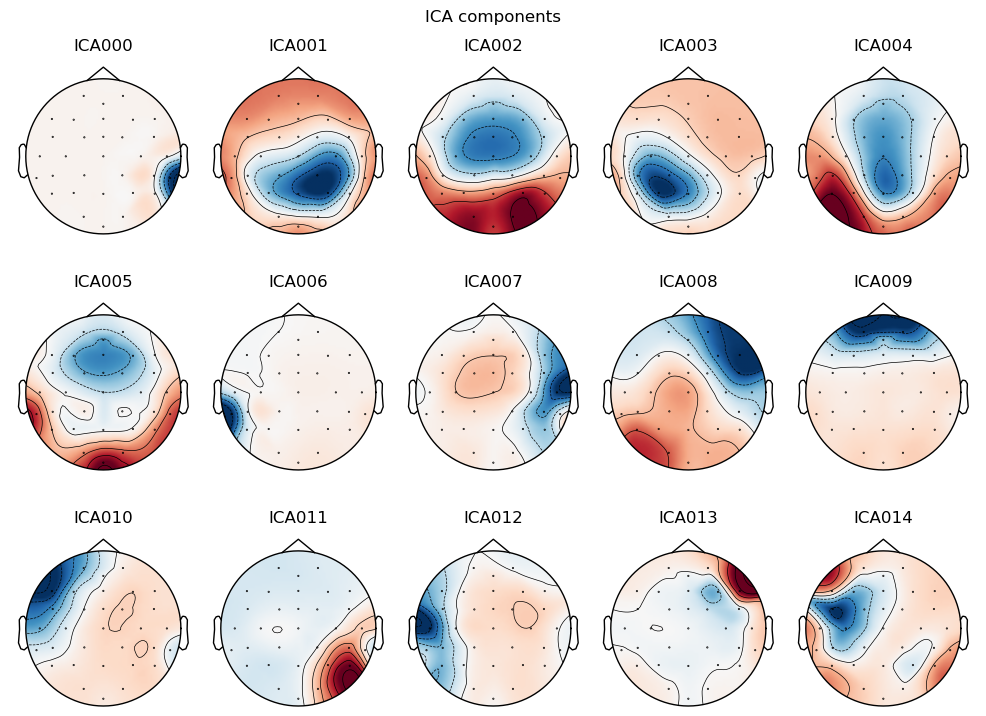

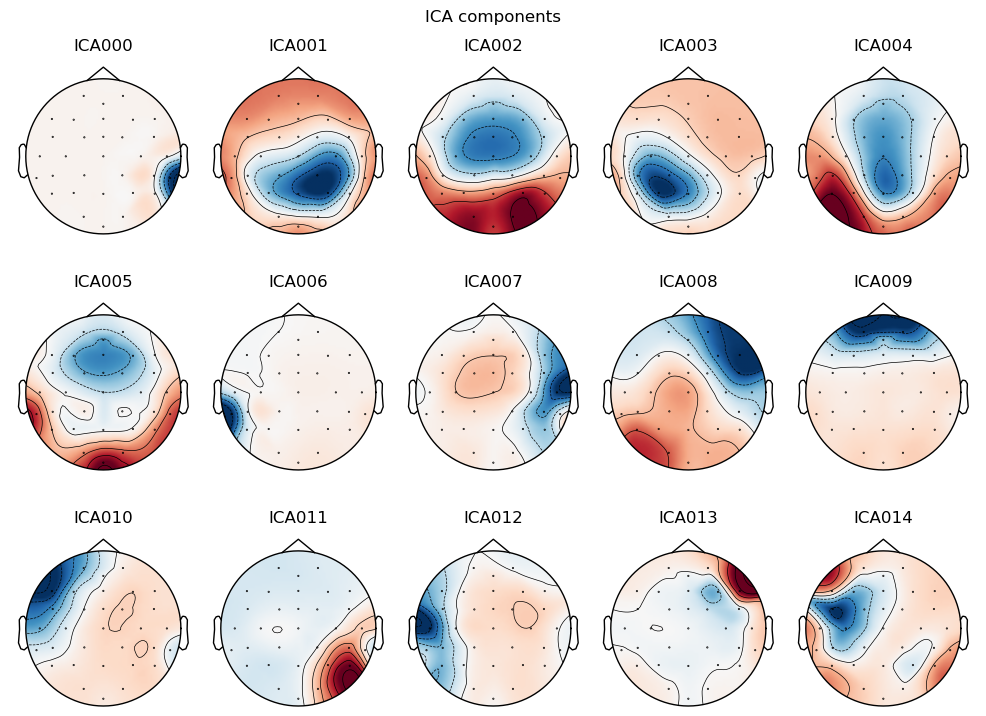

In [19]:
ica_pre.plot_components()
ica_post.plot_components()

In [20]:
labels_pre = ic_labels_pre["labels"]
exclude_idx_pre = [idx for idx, label in enumerate(labels_pre) if label not in ["brain", "other"]]
print(f"Excluding these ICA components in pre: {exclude_idx_pre}")

## Jag tar bort komponent 0 också eftersom den såg konstig ut
labels_post = ic_labels_post["labels"]
exclude_idx_post = [idx for idx, label in enumerate(labels_post) if label not in ["brain", "other"]] + [0]
print(f"Excluding these ICA components in post: {exclude_idx_post}")

Excluding these ICA components in pre: [4, 6, 8, 9, 11, 12, 13]
Excluding these ICA components in post: [6, 9, 13, 0]


In [21]:
# ica.apply() changes the Raw object in-place, so let's make a copy first:
ica_pre.apply(raw_pre, exclude=exclude_idx_pre)
ica_post.apply(raw_post, exclude=exclude_idx_post)

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 7 ICA components
    Projecting back using 32 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 4 ICA components
    Projecting back using 32 PCA components


<RawArray | 32 x 5982408 (1196.5 s), ~1.43 GiB, data loaded>

In [22]:
raw_pre.resample(sfreq=725)
raw_post.resample(sfreq=725)

<RawArray | 32 x 867449 (1196.5 s), ~211.8 MiB, data loaded>

## Preprocessering klar och nu börjar det roliga

In [23]:
#raw_pre.plot()

Effective window size : 2.825 (s)
Plotting power spectral density (dB=True).


/Users/alexe/anaconda3/envs/mneeeg/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


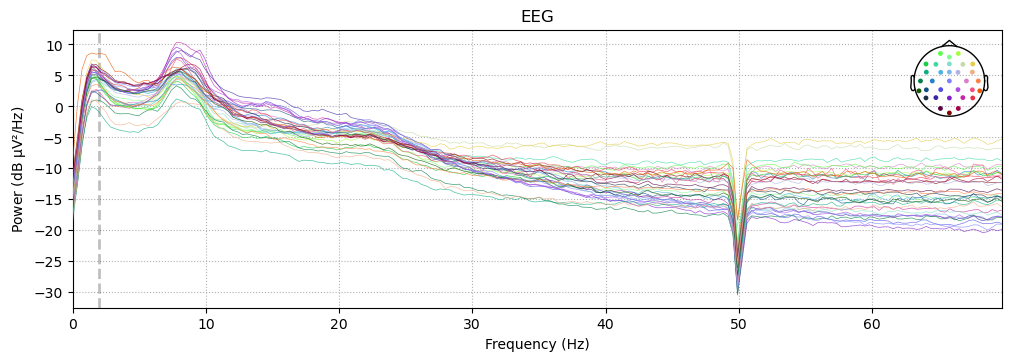

In [24]:
raw_pre.compute_psd(fmax=70).plot()

In [25]:
#raw_post.plot()

Effective window size : 2.825 (s)
Plotting power spectral density (dB=True).


/Users/alexe/anaconda3/envs/mneeeg/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


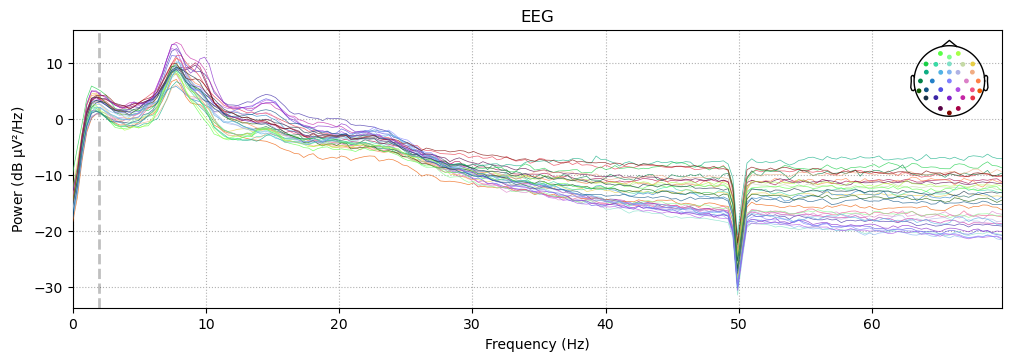

In [26]:
raw_post.compute_psd(fmax=70).plot()

In [27]:
pre_raw_data = raw_pre.get_data()
post_raw_data = raw_post.get_data()

In [28]:
type(pre_raw_data)

numpy.ndarray

In [29]:
tms_eeg_pre = mne.read_epochs('/Users/alexe/Kaggle/tdcs/M_pre_post_tDCS/TMSEEG/out/2025-02-02T180346_M_TMS_pre_phase_2_preproc-epo.fif')
tms_eeg_post = mne.read_epochs('/Users/alexe/Kaggle/tdcs/M_pre_post_tDCS/TMSEEG/out/2025-02-02T192430_M_TMS_post_phase_1_preproc-epo.fif')

Reading /Users/alexe/Kaggle/tdcs/M_pre_post_tDCS/TMSEEG/out/2025-02-02T180346_M_TMS_pre_phase_2_preproc-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 32)  idle
    Found the data of interest:
        t =    -800.00 ...     798.62 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Users/alexe/Kaggle/tdcs/M_pre_post_tDCS/TMSEEG/out/2025-02-02T192430_M_TMS_post_phase_1_preproc-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 32)  idle
    Found the data of interest:
        t =    -800.00 ...     798.62 ms
        0 CTF compensation matrices available
Not setting metadata
74 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [30]:
data = tms_eeg_pre.get_data()

# Compute global min/max
min_val = np.min(data)
max_val = np.max(data)
print(f"Data range: [{min_val:.2e}, {max_val:.2e}] µV")

Data range: [-5.93e+01, 5.35e+01] µV


In [31]:
#tms_eeg_pre.plot(scalings='auto')

In [32]:
evoked_pre = tms_eeg_pre.average()
evoked_post = tms_eeg_post.average()

### Här försöker jag göra som i artikeln nedan

Donoghue, T., Haller, M., Peterson, E. J., Varma, P., Sebastian, P., Gao, R., Noto, T., Lara, A. H., Wallis, J. D., Knight, R. T., Shestyuk, A., & Voytek, B. (2020). Parameterizing neural power spectra into periodic and aperiodic components. Nature Neuroscience, 23(12), 1655–1665. https://doi.org/10.1038/s41593-020-00744-x

In [33]:
from fooof import FOOOF

